In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
import warnings

In [88]:
df = pd.read_csv("advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Check for missing values

In [91]:
df.isnull().values.any()
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
sales_data = sales_data.astype("int") 
sales_data.head()

,TV,Radio,Newspaper,Sales
0,230,37,69,22
1,44,39,45,10
2,17,45,69,12
3,151,41,58,16
4,180,10,58,17


### Data Visualization

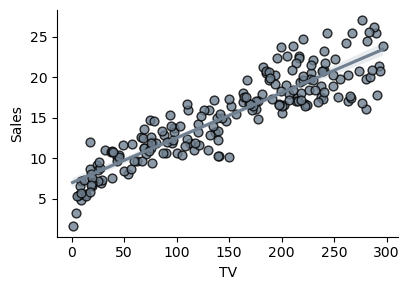

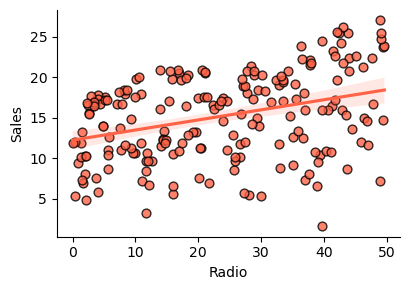

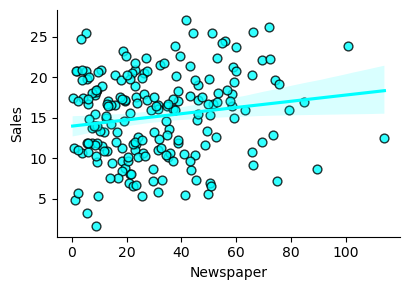

In [92]:

def plot_lmplot(x, y, data, color, size):
    g = sns.lmplot(
        x=x,  y=y, data=data, height=size,  aspect=1.4, scatter_kws={'color': color, 's': 40, 'edgecolor': 'black'},
          line_kws={'color': color}  
    )
    g.fig.tight_layout()  
    plt.show()

# Plot each lmplot with custom settings
plot_lmplot(x='TV', y='Sales', data=df, color='slategrey', size=3)
plot_lmplot(x='Radio', y='Sales', data=df, color='tomato', size=3)
plot_lmplot(x='Newspaper', y='Sales', data=df, color='cyan', size=3)


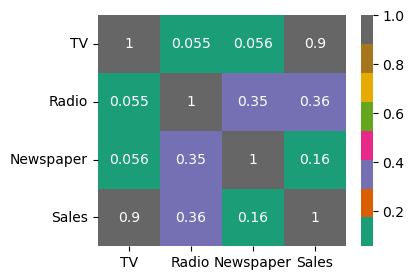

In [93]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(4, 3))
sns.heatmap(sales_data.corr(),annot = True , cmap="Dark2")
plt.show()

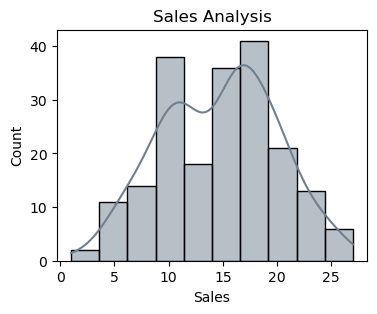

In [95]:

plt.figure(figsize=(4, 3)) 
sns.histplot(sales_data["Sales"], color="slategrey", kde=True)
plt.title("Sales Analysis")
plt.show()


In [96]:
sales_data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.055388,0.055569,0.899568
Radio,0.055388,1.000000,0.352552,0.355736
Newspaper,0.055569,0.352552,1.000000,0.159715
Sales,0.899568,0.355736,0.159715,1.000000


In [78]:
X = df.drop('Sales', axis=1)
y = df[["Sales"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)

### Linear Regression Model

In [79]:
lin_model = sm.ols(formula="Sales ~ TV + Radio + Newspaper", data=df).fit()

In [80]:
# Print the coefficients of the linear model

print(lin_model.params, "\n")

Intercept    4.625124
TV           0.054446
Radio        0.107001
Newspaper    0.000336
dtype: float64 



In [97]:
# Evaluate the model
results = []
names = []

# Define a list of models to evaluate
models = [('LinearRegression', LinearRegression())]


In [99]:
#Evaluate each model by fitting to the data and computing RMSE
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append(result)
    names.append(name)
    msg = "%s: %f" % (name, result)
    print(msg)

LinearRegression: 1.612152


In [100]:
new_data = pd.DataFrame({'TV': [100], 'Radio': [50], 'Newspaper': [25]})
predicted_sales = lin_model.predict(new_data)
print("Predicted Sales:", predicted_sales)

Predicted Sales: 0    15.428155
dtype: float64
